In [29]:
img_PATH = '../img_data/Form-2.jpg'

'''모델 예측 '''  
import cv2
import numpy as np
import json
from PIL import Image
from RCF_model import RCF, device, find_contours,four_point_transform,plt_imshow

model = RCF(device=device)

# 이미지를 불러온다
img = cv2.imread(img_PATH)

# def get_prediction(img):
    
# 모델에 넣어 경계선 이미지 받는다.
edge_img = model.detect_edge(img)

# 경계선이미지의 꼭짓점을 찾는다
# 모양 [[[2200,    0]], [[2135,    0]], [[2157,   32]], [[2158,   80]]]
contours = find_contours(edge_img, 1)
contours
# 모양 바꾸기
contours = [item[0] for item in contours]
# predicted_points = [list(np.array(item, dtype=np.int32)) for item in contours]
predicted_points = [[int(item) for item in np.array(contour, dtype=np.int32)] for contour in contours]
predicted_points
# [[2200, 0], [2135, 0], [2157, 32], [2158, 80]] 형태로 서버로 보낼것이다
# return predicted_points

# 사용자가 predicted_points 좌표를 확인하고(수정이 될수도있다) 다시 받으면 이미지 원근변환 실행
# 이런식으로 들어온다. 정렬되지않음
# [[714, 461], [2505, 644],[223, 3553], [2488, 3654]] => 형식을 다시 복구한다
# def get_points_and_perspective_transform(img, predicted_points):
# numpy 3차원으로 변환
predicted_points = np.array(predicted_points, dtype=int).reshape(-1, 1, 2)
dewarped_doc = four_point_transform(img, predicted_points.reshape(4, 2))
# plt_imshow("Receipt Transform", dewarped_doc)
dewarped_doc
    
    


[RCF] loading with cpu
[RCF] finished loading (2.0202 sec)
시작시간 : 2024-01-31 09:16:22.087540
종료시간 : 2024-01-31 09:16:28.842352
수행시간 : 6 초



array([[[ 21,  25,  43],
        [ 21,  25,  43],
        [ 21,  25,  43],
        ...,
        [ 51,  78,  98],
        [ 51,  78,  98],
        [ 51,  78,  99]],

       [[ 21,  25,  43],
        [ 21,  25,  43],
        [ 21,  25,  43],
        ...,
        [ 51,  78,  98],
        [ 51,  78,  98],
        [ 51,  78, 100]],

       [[ 21,  25,  43],
        [ 21,  25,  43],
        [ 21,  25,  43],
        ...,
        [ 51,  78,  98],
        [ 51,  78,  99],
        [ 51,  77, 100]],

       ...,

       [[  4,   2,  24],
        [  4,   2,  24],
        [  4,   2,  24],
        ...,
        [ 21,  30,  53],
        [ 19,  28,  50],
        [ 19,  29,  49]],

       [[  4,   2,  24],
        [  4,   2,  24],
        [  4,   2,  24],
        ...,
        [ 25,  35,  60],
        [ 23,  34,  57],
        [ 23,  34,  54]],

       [[  4,   2,  24],
        [  4,   2,  24],
        [  4,   2,  24],
        ...,
        [ 26,  37,  64],
        [ 25,  37,  61],
        [ 24,  35,  57]]

In [36]:
# 이미지를 Base64 인코딩으로 변환
import os
_, buffer = cv2.imencode('.jpg', dewarped_doc)
encoded_image = base64.b64encode(buffer).decode()
encoded_image

# 저장할 경로 설정
image_directory = './tempd'  
if not os.path.exists(image_directory):
    os.makedirs(image_directory)

image_path = os.path.join(image_directory)
# 이미지 파일 저장
encoded_image.save(image_path)
print('파일저장했음')

AttributeError: 'str' object has no attribute 'save'

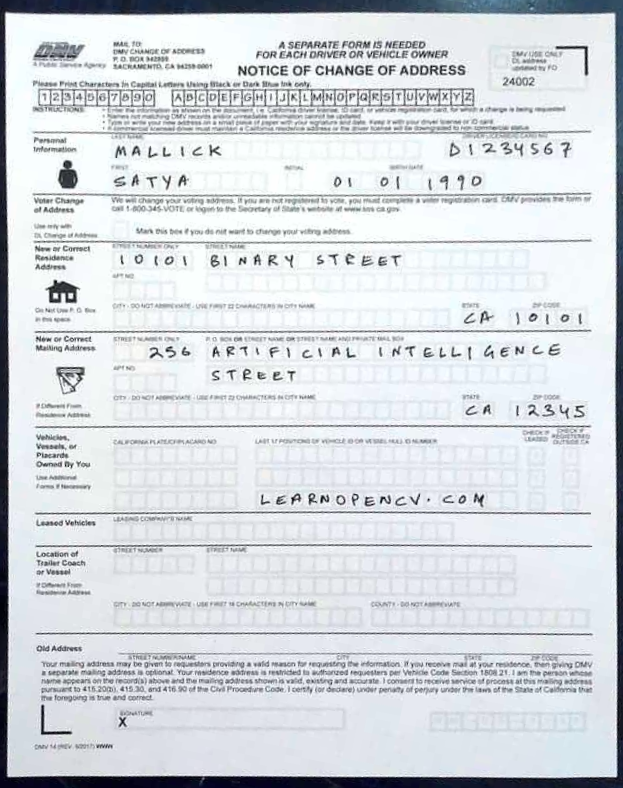

In [30]:
dewarped_doc_img = Image.fromarray(dewarped_doc, 'RGB')
dewarped_doc_img

In [ ]:
from PIL import Image
image = Image.fromarray(dewarped_doc, 'RGB')

image.save('output_image.png')


In [31]:
import os
import base64
def get_latest_file(image_directory):
    # 디렉토리 내의 모든 파일 및 서브디렉토리의 경로를 가져옵니다.
    all_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory)]

    # 파일이 아닌 항목들을 필터링합니다.
    all_files = [f for f in all_files if os.path.isfile(f)]

    # 파일들을 마지막 수정 시간에 따라 정렬합니다.
    all_files.sort(key=lambda x: os.path.getmtime(x), reverse=True)

    # 가장 최근에 수정된 파일을 반환합니다.
    return all_files[0] if all_files else None

latest_file = get_latest_file('./path_to_save_images')
latest_file
